# Test matching on author covariates
We've seen in the regression analysis that the media variable is generally not significant, but this may be due to the other covariates' confounding effects.

Let's try to match each Latin America media sharing author with another US media sharing author, based on their covariates: language, location, prior use of integrated verbs.

In [4]:
# load author social data
import pandas as pd
loanword_author_social_data = pd.read_csv('../../data/mined_tweets/loanword_verbs_media_balanced_post_social_data.tsv', sep='\t')
loanword_author_social_data.fillna('', inplace=True)
# restrict to valid data
valid_social_vars = ['description_location_region', 'es', 'latin_american_media_pct', 'integrated_verb_pct']
clean_loanword_author_social_data = loanword_author_social_data.copy()
for social_var in valid_social_vars:
    clean_loanword_author_social_data = clean_loanword_author_social_data[clean_loanword_author_social_data.loc[:, social_var] != '']
print(clean_loanword_author_social_data.shape[0])
cat_vars = ['description_location_region', 'es_bin', 'latin_american_media_pct_bin']
for cat_var in cat_vars:
    print(clean_loanword_author_social_data.loc[:, cat_var].value_counts())
## add variable for "treatment" i.e. amount of Latin American media shared
media_share_cutoff = 0.75
media_var = 'latin_american_media_pct'
clean_loanword_author_social_data = clean_loanword_author_social_data.assign(**{
    'high_latin_american_media' : (clean_loanword_author_social_data.loc[:, media_var] >= media_share_cutoff).astype(int)
})
print(clean_loanword_author_social_data.loc[:, 'high_latin_american_media'].value_counts())
display(clean_loanword_author_social_data.head())

1227
other            732
latin_america    381
europe            76
us_america        38
Name: description_location_region, dtype: int64
es_mid     1187
es_low       28
es_high      12
Name: es_bin, dtype: int64
media_low     670
media_high    357
media_mid     200
Name: latin_american_media_pct_bin, dtype: int64
0    829
1    398
Name: high_latin_american_media, dtype: int64


,loanword,loanword_verb,loanword_type,screen_name,user_id,text,created_at,id,user_description,user_location,...,log_us_american_music_genre_count,log_latin_american_media_count,log_us_american_media_count,log_latin_american_media_pct,log_integrated_verb_pct,log_post_pct,log_URL_share_pct,log_RT_pct,latin_american_media_pct_bin,high_latin_american_media
70,ban,baneo,integrated_loanword,julianhckr,760320658546929665,@diego_mehary Mod menú de USB Jajajajaja direc...,2017-08-02T19:54:37+00:00,892836052490227717,ROAD TO 2.5K SUBS xD YOUTUBE CHANNEL🔴 [JULIANHCK],"Medellín, Colombia",...,-4.60517,-4.60517,0.00995033,-4.60517,0.00995033,0.701259,-3.547075,-4.605170,media_low,0
179,audit,auditar,integrated_loanword,yerardjimenez,1339395775,La Cámara de Cuentas debe auditar la Universid...,2017-07-25T14:04:23+00:00,889848810477944832,"Ataráxico // Advertiser, amateur writer, bloge...",República Dominicana,...,-4.60517,0.00995033,-4.60517,0.00995033,-0.0897424,0.410119,-2.778100,-4.198703,media_high,1
218,ban,banean,integrated_loanword,darkheart_17,633568967,@rafascryleon ya haha bueno esta claro k yo no...,2017-07-17T19:26:51+00:00,887030858917478402,LOVE AND RESPECTBE REAL BE LOYALLOVE YOURSELF/...,UNKNOWN,...,-4.60517,-4.60517,1.10194,-4.60517,-0.0633963,6.904761,-3.471732,-4.605170,media_low,0
434,boycott,boicotear,integrated_loanword,huitzilopochtli,15762479,Todos quieren boicotear Gatorade hasta que les...,2017-08-01T20:47:30+00:00,892486973130129408,"dios azteca, ludópata, cunilingüista freelance...",donde suene chido,...,0.00995033,-4.60517,0.698135,-4.60517,0.00995033,0.391042,-3.964734,-4.343496,media_low,0
575,check,chequear,integrated_loanword,isiscarsep,764581298769801216,@xlinj mmmm voy a darme la vuelta a chequear j...,2017-08-06T17:54:58+00:00,894255493040001024,Papelón tras papelón.,UPRRP,...,1.10194,1.94734,1.10194,-0.34249,0.00995033,0.386682,-2.636048,-3.874573,media_mid,0


In [2]:
# convert to binary variable format
binary_vars = ['description_location_region']
for binary_var in binary_vars:
    # convert to dummy vals
    dummy_vals = pd.get_dummies(clean_loanword_author_social_data.loc[:, binary_var])
    if(len(set(dummy_vals.columns) & set(clean_loanword_author_social_data.columns))==0):
        clean_loanword_author_social_data = pd.concat([clean_loanword_author_social_data, dummy_vals], axis=1)

In [3]:
display(clean_loanword_author_social_data.head())

,screen_name,description_location_region,es,es_bin,total_video_count,latin_american_artist_video_count,us_american_artist_video_count,latin_american_artist_video_pct,total_music_count,latin_american_music_genre_pct,...,us_american_music_genre_count,latin_american_media_count,us_american_media_count,latin_american_media_pct,integrated_verb_pct,high_latin_american_media,europe,latin_america,other,us_america
46,xsolars,latin_america,0.811258,es_high,1,0,1,0,0,0,...,0,0,1,0,0.990385,0,0,1,0,0
81,readytofallin,latin_america,0.947257,es_high,0,0,0,0,1,0,...,1,0,1,0,0.966667,0,0,1,0,0
160,vanne_vsb,latin_america,0.946809,es_high,1,1,0,1,0,0,...,0,1,0,1,1,1,0,1,0,0
238,juanpas2013,latin_america,0.934278,es_high,1,1,0,1,0,0,...,0,1,0,1,0.983333,1,0,1,0,0
455,dylath_leen_,latin_america,0.918679,es_high,0,0,0,0,4,0,...,4,0,4,0,0.916667,0,0,1,0,0


In [5]:
location_var = 'description_location_region'
location_vals = list(clean_loanword_author_social_data.loc[:, location_var].unique())
location_val_str = ' + '.join(location_vals)
lang_var = 'es'
native_verb_var = 'integrated_verb_pct'
media_treatment_var = 'high_latin_american_media'
match_model = f'CASE ~ {lang_var} + {native_verb_var} + {location_val_str}'
match_data_file = '../../data/mined_tweets/loanword_author_match_data.csv'
matching_vars = location_vals + [lang_var, native_verb_var, media_treatment_var]
match_data = clean_loanword_author_social_data.loc[:, matching_vars]
# add ID var
match_id_var = 'OPTUM_LAB_ID'
author_var = 'screen_name'
match_data = match_data.assign(**{
    match_id_var : clean_loanword_author_social_data.loc[:, author_var].values
})
# rename treatment var
match_data.rename(columns={media_treatment_var : 'CASE'}, inplace=True)
match_data.to_csv(match_data_file, index=False)

What are the distributions of covariates before matchign?

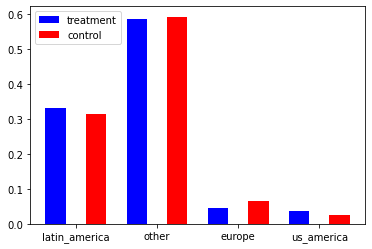

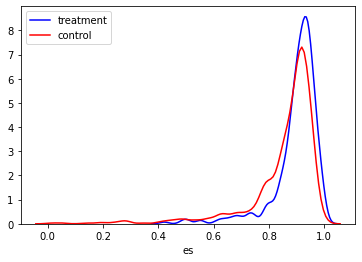

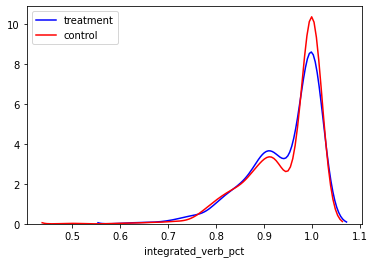

In [9]:
# plot everything
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
treatment_var = 'CASE'
treatment_data = match_data[match_data.loc[:, treatment_var]==1]
control_data = match_data[match_data.loc[:, treatment_var]==0]
# binary vals
treatment_location_pct = treatment_data.loc[:, location_vals].sum(axis=0) / treatment_data.shape[0]
control_location_pct = control_data.loc[:, location_vals].sum(axis=0) / control_data.shape[0]
X = np.arange(len(treatment_location_pct))
bar_width = 0.25
bar_offset = 0.25
plt.bar(X-bar_offset, treatment_location_pct, width=bar_width, color='b', label='treatment')
plt.bar(X+bar_offset, control_location_pct, width=bar_width, color='r', label='control')
plt.xticks(X, location_vals)
plt.legend(loc='upper left')
plt.show()
# scalar vars
scalar_vars = ['es', 'integrated_verb_pct']
for scalar_var in scalar_vars:
    sns.distplot(treatment_data.loc[:, scalar_var], hist=False, rug=False, color='b', label='treatment')
    sns.distplot(control_data.loc[:, scalar_var], hist=False, rug=False, color='r', label='control')
    plt.legend(loc='upper left')
    plt.show()

OK! So the treatment users:
- more likely to be from Latin America
- less likely to be from Europe
- more likely to use more Spanish
- more likely to use fewer integrated verbs

## Match authors
Let's try [this package](https://github.com/rlirey/psmatching) for propensity score matching.

In [6]:
from psmatching.match import PSMatch
k = "1"
matcher = PSMatch(match_data_file, match_model, k)
matcher.prepare_data()
matcher.match(caliper=None, replace=False)
matcher.evaluate()


Calculating propensity scores ... 

/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


DONE!
Preparing data ... DONE!

Matching [1] controls to each case ...  DONE!
Writing matched data to file ... DONE!

Evaluating matches ...
	es: PASSED
	integrated_verb_pct: PASSED
	latin_america: PASSED
	other: PASSED
	europe: PASSED
	us_america: PASSED

All variables were successfully matched!


True

In [7]:
print(match_data.shape[0])
display(matcher.matched_data)

1098


,latin_america,other,europe,us_america,es,integrated_verb_pct,CASE,PROPENSITY
OPTUM_LAB_ID,,,,,,,,
xsolars,1,0,0,0,0.811258,0.990385,0,0.260182
readytofallin,1,0,0,0,0.947257,0.966667,0,0.401535
vanne_vsb,1,0,0,0,0.946809,1.000000,1,0.398643
juanpas2013,1,0,0,0,0.934278,0.983333,1,0.385797
esquivandofm,1,0,0,0,0.939547,1.000000,1,0.390494
...,...,...,...,...,...,...,...,...
wadamalpica,0,1,0,0,0.885535,1.000000,1,0.332905
gabyruizh,0,1,0,0,0.941379,1.000000,0,0.393473
alberto_vargas8,1,0,0,0,0.930900,1.000000,0,0.380870


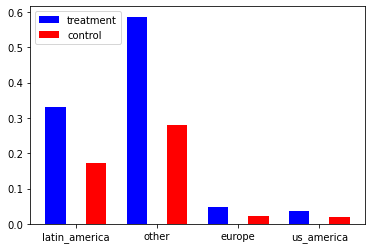

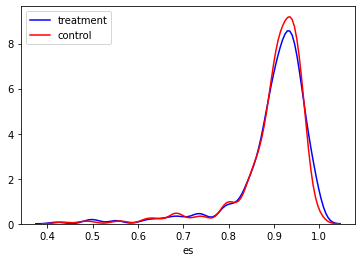

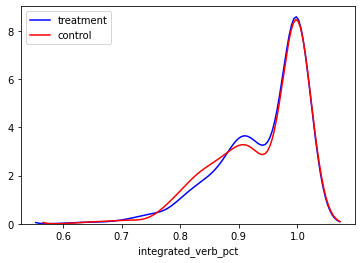

In [11]:
# plot everything
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
treatment_var = 'CASE'
matched_treatment_data = matcher.matched_data[matcher.matched_data.loc[:, treatment_var]==1]
matched_control_data = matcher.matched_data[matcher.matched_data.loc[:, treatment_var]==0]
# binary vals
treatment_location_pct = matched_treatment_data.loc[:, location_vals].sum(axis=0) / treatment_data.shape[0]
control_location_pct = matched_control_data.loc[:, location_vals].sum(axis=0) / control_data.shape[0]
X = np.arange(len(treatment_location_pct))
bar_width = 0.25
bar_offset = 0.25
plt.bar(X-bar_offset, treatment_location_pct, width=bar_width, color='b', label='treatment')
plt.bar(X+bar_offset, control_location_pct, width=bar_width, color='r', label='control')
plt.xticks(X, location_vals)
plt.legend(loc='upper left')
plt.show()
# scalar vars
scalar_vars = ['es', 'integrated_verb_pct']
for scalar_var in scalar_vars:
    sns.distplot(matched_treatment_data.loc[:, scalar_var], hist=False, rug=False, color='b', label='treatment')
    sns.distplot(matched_control_data.loc[:, scalar_var], hist=False, rug=False, color='r', label='control')
    plt.legend(loc='upper left')
    plt.show()

OK! The locations are imbalanced but the scalar variables are more balanced.

Let's use a less hacky package, [this one](https://github.com/laurencium/causalinference) for causal inference.

In [26]:
# we need to get light verb use first as the outcome variable
loanword_post_data = pd.read_csv('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', sep='\t')
author_var = 'screen_name'
dep_var = 'has_light_verb'
per_author_light_verb_pct = loanword_post_data.groupby(author_var).apply(lambda x: x.loc[:, dep_var].mean())
light_verb_use_cutoff = 0.5
per_author_outcome = (per_author_light_verb_pct > light_verb_use_cutoff).astype(int)
print(per_author_outcome.value_counts())
outcome_var = 'freq_light_verb'
per_author_outcome = per_author_outcome.reset_index().rename(columns={0 : outcome_var})
display(per_author_outcome.head())
# combine with match data
outcome_match_data = pd.merge(match_data.rename(columns={'OPTUM_LAB_ID' : author_var}), per_author_outcome, on=author_var)
# add log vars
scalar_control_vars = ['es', 'integrated_verb_pct']
smooth_val = 1e-2
for scalar_control_var in scalar_control_vars:
    outcome_match_data = outcome_match_data.assign(**{
        f'log_{scalar_control_var}' : outcome_match_data.loc[:, scalar_control_var].apply(lambda x: np.log(x+smooth_val))
    })
display(outcome_match_data.head())

0    56029
1    24892
dtype: int64


,screen_name,freq_light_verb
0,0001101011001e,0
1,0001sunshine,0
2,000822e5bc974e0,0
3,0009_bts,1
4,000i00i,0


,latin_america,other,europe,us_america,es,integrated_verb_pct,CASE,screen_name,freq_light_verb,log_es,log_integrated_verb_pct
0,1,0,0,0,0.811258,0.990385,0,xsolars,1,-0.196918,0.000385
1,1,0,0,0,0.947257,0.966667,0,readytofallin,1,-0.043683,-0.023610
2,1,0,0,0,0.946809,1,1,vanne_vsb,1,-0.044152,0.009950
3,1,0,0,0,0.934278,0.983333,1,juanpas2013,1,-0.057334,-0.006689
4,1,0,0,0,0.918679,0.916667,0,dylath_leen_,1,-0.073993,-0.076161


In [47]:
from causalinference import CausalModel
treatment_var = 'CASE'
lang_var = 'es'
location_vals = list(clean_loanword_author_social_data.loc[:, location_var].unique())
native_verb_var = 'integrated_verb_pct'
control_vars = [lang_var, native_verb_var] + location_vals
Y = outcome_match_data.loc[:, outcome_var]
D = outcome_match_data.loc[:, treatment_var]
# X = outcome_match_data.loc[:, ['es', 'integrated_verb_pct']]
X = outcome_match_data.loc[:, control_vars]
# fix columns
# scalar_control_vars = ['es', 'integrated_verb_pct']
scalar_control_vars = ['es', 'integrated_verb_pct']
for scalar_control_var in scalar_control_vars:
    X = X.assign(**{scalar_control_var : X.loc[:, scalar_control_var].apply(lambda x: float(x))})
causal_model = CausalModel(Y.values, D.values, X.values)

In [48]:
print(causal_model.summary_stats)


Summary Statistics

                       Controls (N_c=735)         Treated (N_t=363)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.306        0.461        0.303        0.460       -0.003

                       Controls (N_c=735)         Treated (N_t=363)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.854        0.131        0.899        0.084        0.403
             X1        0.944        0.075        0.941        0.073       -0.038
             X2        0.314        0.465        0.331        0.471        0.035
             X3        0.593        0.492        0.587        0.493       -0.013
             X4        0.067        0.250        0.047        0.212       -0.086
      

In [49]:
causal_model.est_propensity()
print(causal_model.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept     -3.6189686330.174     -0.000      1.000-18985210.75918985203.523
            X0      4.698      0.846      5.555      0.000      3.040      6.355
            X1     -0.298      0.895     -0.333      0.739     -2.053      1.456
            X2     -0.9439686330.174     -0.000      1.000-18985208.08318985206.198
            X3     -0.9399686330.174     -0.000      1.000-18985208.07918985206.202
            X4     -1.3309686330.174     -0.000      1.000-18985208.47018985205.811
            X5     -0.4079686330.174     -0.000      1.000-18985207.54818985206.734



In [52]:
causal_model.est_via_ols()
causal_model.est_via_matching(weights='maha')
print(causal_model.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.005      0.031      0.163      0.871     -0.056      0.066
           ATC      0.005      0.033      0.146      0.884     -0.059      0.069
           ATT      0.006      0.030      0.186      0.852     -0.053      0.064

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.014      0.051     -0.265      0.791     -0.115      0.087
           ATC     -0.010      0.058     -0.164      0.870     -0.123      0.104
           ATT     -0.022      0.058     -0.383      0.702     -0.135      0.091



OK! Both matching and OLS cannot demonstrate a significant effect of the treatment on an outcome.

### Active authors

Is this effect observed even for the more active authors?

In [56]:
author_var = 'screen_name'
author_counts = loanword_post_data.loc[:, author_var].value_counts()
min_author_count = 2
freq_authors = author_counts[author_counts >= min_author_count].index.tolist()
print(len(freq_authors))

4543


In [57]:
freq_outcome_match_data = outcome_match_data[outcome_match_data.loc[:, author_var].isin(freq_authors)]
print(freq_outcome_match_data.shape[0])

99


In [58]:
from causalinference import CausalModel
treatment_var = 'CASE'
lang_var = 'es'
location_vals = list(clean_loanword_author_social_data.loc[:, location_var].unique())
native_verb_var = 'integrated_verb_pct'
control_vars = [lang_var, native_verb_var] + location_vals
Y = freq_outcome_match_data.loc[:, outcome_var]
D = freq_outcome_match_data.loc[:, treatment_var]
# X = outcome_match_data.loc[:, ['es', 'integrated_verb_pct']]
X = freq_outcome_match_data.loc[:, control_vars]
# fix columns
# scalar_control_vars = ['es', 'integrated_verb_pct']
scalar_control_vars = ['es', 'integrated_verb_pct']
for scalar_control_var in scalar_control_vars:
    X = X.assign(**{scalar_control_var : X.loc[:, scalar_control_var].apply(lambda x: float(x))})
causal_model = CausalModel(Y.values, D.values, X.values)

In [59]:
print(causal_model.summary_stats)


Summary Statistics

                        Controls (N_c=72)          Treated (N_t=27)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.125        0.333        0.148        0.362        0.023

                        Controls (N_c=72)          Treated (N_t=27)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.887        0.077        0.881        0.119       -0.059
             X1        0.945        0.066        0.936        0.065       -0.131
             X2        0.292        0.458        0.222        0.424       -0.157
             X3        0.583        0.496        0.630        0.492        0.094
             X4        0.097        0.298        0.037        0.192       -0.240
      

In [60]:
causal_model.est_via_ols()
causal_model.est_via_matching(weights='maha')
print(causal_model.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.030      0.082      0.373      0.709     -0.129      0.190
           ATC      0.034      0.083      0.413      0.680     -0.129      0.198
           ATT      0.018      0.078      0.235      0.814     -0.135      0.171

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.101      0.152      0.664      0.507     -0.197      0.399
           ATC      0.139      0.169      0.823      0.411     -0.192      0.470
           ATT      0.000      0.164      0.000      1.000     -0.322      0.322



OK! Still no consistent effect.

### Match authors on covariates, compare light verb use

Let's first match authors using the standard nearest neighbors technique, then count the light verb use in different conditions (high media vs. low media).

In [225]:
import pandas as pd
loanword_author_social_data = pd.read_csv('../../data/mined_tweets/loanword_authors_combined_balanced_media_full_social_data.tsv', sep='\t')
loanword_author_social_data.fillna('', inplace=True)
# restrict to valid data
valid_social_vars = ['description_location_region', 'es', 'latin_american_media_pct', 'integrated_verb_pct']
clean_loanword_author_social_data = loanword_author_social_data.copy()
for social_var in valid_social_vars:
    clean_loanword_author_social_data = clean_loanword_author_social_data[clean_loanword_author_social_data.loc[:, social_var] != '']
# fix scalar vars
scalar_vars = ['es', 'integrated_verb_pct']
smooth_val = 1e-2
for scalar_var in scalar_vars:
    clean_loanword_author_social_data = clean_loanword_author_social_data.assign(**{
        scalar_var : clean_loanword_author_social_data.loc[:, scalar_var].astype(float)
    })
    # compute log
    clean_loanword_author_social_data = clean_loanword_author_social_data.assign(**{
        f'log_{scalar_var}' : np.log(clean_loanword_author_social_data.loc[:, scalar_var]+smooth_val)
    })
print(clean_loanword_author_social_data.shape[0])

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1098


In [226]:
# convert categorical vars to dummies
cat_var = 'description_location_region'
author_location_vals = pd.get_dummies(clean_loanword_author_social_data.loc[:, cat_var])
unique_locations = set(author_location_vals.columns)
cat_var_rescale_factor = 0.5
if(len(unique_locations & set(clean_loanword_author_social_data.columns)) == 0):
    clean_loanword_author_social_data = pd.concat([clean_loanword_author_social_data, author_location_vals], axis=1)
# replace dummy vals with 1/2 the value so that we don't double-count them during distance calculation
# e.g. if A=(1 0 0 0) and B=(0 0 0 1), then dist(A, B) should be 1; therefore A=(0.5 0 0 0) and B=(0 0 0 0.5)
    for location_i in unique_locations:
        clean_loanword_author_social_data = clean_loanword_author_social_data.assign(**{
            location_i : clean_loanword_author_social_data.loc[:, location_i] * cat_var_rescale_factor
        })
display(clean_loanword_author_social_data.head())

,screen_name,description_location_region,es,es_bin,total_video_count,latin_american_artist_video_count,us_american_artist_video_count,latin_american_artist_video_pct,total_music_count,latin_american_music_genre_pct,...,latin_american_media_count,us_american_media_count,latin_american_media_pct,integrated_verb_pct,log_es,log_integrated_verb_pct,europe,latin_america,other,us_america
46,xsolars,latin_america,0.811258,es_high,1,0,1,0,0,0,...,0,1,0,0.990385,-0.196918,0.000385,0.0,0.5,0.0,0.0
81,readytofallin,latin_america,0.947257,es_high,0,0,0,0,1,0,...,0,1,0,0.966667,-0.043683,-0.023610,0.0,0.5,0.0,0.0
160,vanne_vsb,latin_america,0.946809,es_high,1,1,0,1,0,0,...,1,0,1,1.000000,-0.044152,0.009950,0.0,0.5,0.0,0.0
238,juanpas2013,latin_america,0.934278,es_high,1,1,0,1,0,0,...,1,0,1,0.983333,-0.057334,-0.006689,0.0,0.5,0.0,0.0
455,dylath_leen_,latin_america,0.918679,es_high,0,0,0,0,4,0,...,0,4,0,0.916667,-0.073993,-0.076161,0.0,0.5,0.0,0.0


### Compare high vs. low media authors

In [264]:
# treatment = high media sharing
media_pct_lower_cutoff = 0.5
media_pct_upper_cutoff = 0.5
media_var = 'latin_american_media_pct'
treatment_data = clean_loanword_author_social_data[clean_loanword_author_social_data.loc[:, media_var] >= media_pct_upper_cutoff]
control_data = clean_loanword_author_social_data[clean_loanword_author_social_data.loc[:, media_var] < media_pct_lower_cutoff]
match_vals = ['log_es', 'log_integrated_verb_pct'] + list(unique_locations)
treatment_data = treatment_data.loc[:, match_vals]
control_data = control_data.loc[:, match_vals]
print('%d treatment authors'%(treatment_data.shape[0]))
print('%d control authors'%(control_data.shape[0]))

494 treatment authors
604 control authors


Let's visualize the covariates before matching.

In [265]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
def visualize_test_treat_control_data(treat_data, control_data, cat_vals, scalar_vars, cat_var_rescale_factor=0.5):
    treat_location_pct = treat_data.loc[:, unique_locations].sum(axis=0) / cat_var_rescale_factor / treat_data.shape[0]
    control_location_pct = control_data.loc[:, unique_locations].sum(axis=0) / cat_var_rescale_factor / control_data.shape[0]
    X = np.arange(len(treat_location_pct))
    bar_width = 0.25
    bar_offset = 0.25
    plt.bar(X-bar_offset, treat_location_pct, width=bar_width, color='b', label='treat')
    plt.bar(X+bar_offset, control_location_pct, width=bar_width, color='r', label='control')
    plt.xticks(X, unique_locations)
    plt.legend(loc='upper left')
    plt.show()
    # scalar vars
#     scalar_vars = ['log_es', 'log_integrated_verb_pct']
    for scalar_var in scalar_vars:
        sns.distplot(treat_data.loc[:, scalar_var], hist=False, rug=False, color='b', label='treat')
        sns.distplot(control_data.loc[:, scalar_var], hist=False, rug=False, color='r', label='control')
        plt.legend(loc='upper left')
        plt.show()
        # test for significant differences
        test_stat, p_val = mannwhitneyu(treat_data.loc[:, scalar_var].values, 
                                        control_data.loc[:, scalar_var].values)
        print('distributions are different with test stat = %.3f (p=%.3E)'%(test_stat, p_val))

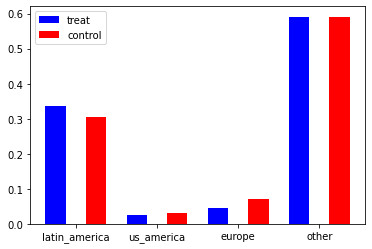

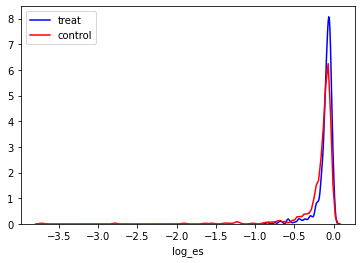

distributions are different with test stat = 110610.000 (p=7.927E-14)


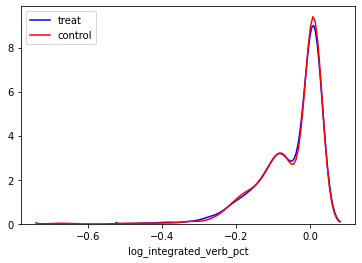

distributions are different with test stat = 148174.500 (p=4.179E-01)


In [266]:
# let's plot the distribution of covariates before matching
scalar_vars = ['log_es', 'log_integrated_verb_pct']
visualize_test_treat_control_data(treatment_data, control_data, unique_locations, scalar_vars, cat_var_rescale_factor=cat_var_rescale_factor)

In [267]:
# match everyone
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_helpers import get_matching_pairs
match_data = get_matching_pairs(treatment_data, control_data, scaler=True)

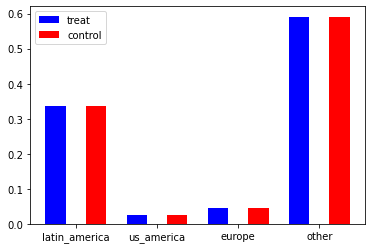

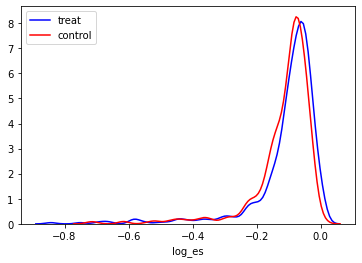

distributions are different with test stat = 104279.500 (p=3.823E-05)


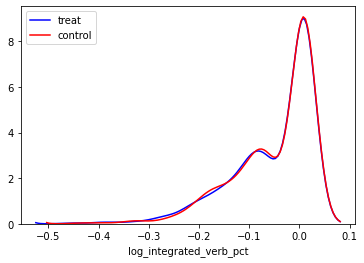

distributions are different with test stat = 120810.000 (p=3.868E-01)


In [268]:
scalar_vars = ['log_es', 'log_integrated_verb_pct']
visualize_test_treat_control_data(treatment_data, match_data, unique_locations, scalar_vars, cat_var_rescale_factor=cat_var_rescale_factor)

OK! This is better but still not perfect. BUT if we assume that we are binning the `ES` variable, then the overlap is probably good enough (similar number of `high_ES` authors).

Now! Let's compare the counts of light verbs among the matched authors.

In [244]:
loanword_post_data = pd.read_csv('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', sep='\t')
display(loanword_post_data.head())

,loanword,loanword_verb,loanword_type,screen_name,user_id,text,date,id,user_description,user_location,...,us_american_artist_video_count,latin_american_artist_video_pct,total_music_count,latin_american_music_genre_pct,latin_american_music_genre_count,us_american_music_genre_count,latin_american_media_count,us_american_media_count,latin_american_media_pct,integrated_verb_pct
0,audit,auditamos,integrated_loanword,garrachavista,779318307585396736,@Sheiladarsy @anticuarta4 Y dime tu cuales 7.6...,NaN,892506833197424640,100% a la izquierda,Venezuela,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,ban,baneamos,integrated_loanword,emmanuelkiller5,4273648032,@adameamiro Eres tan hipocrita que antes nos h...,NaN,882375684823203841,"Felicidad?Que es eso, lo que todos siempre me ...","Chihuahua, Chihuahua",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ban,baneamos,integrated_loanword,danitolocirio13,482233447,@LVPibai Ibai te hace una normal de reclu? Así...,NaN,893999585953185793,#21. Me gusta Love Live. Reborn. Baraggan y Es...,"Valladolid, España",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,flip,flipas,integrated_loanword,danitolocirio13,482233447,Me echaba unas rankeds ahora que flipas,NaN,949837604362612736,#22. Vago...,"Valladolid, España",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,ban,banear,integrated_loanword,vcf973,883037197754093569,@MiiKeLMsT MIKEEL! CASI ME BANEAN POR COMPRAR ...,NaN,899277329012334593,.,Tenerife,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
author_var = 'screen_name'
treated_authors = clean_loanword_author_social_data.loc[treatment_data.index, :].loc[:, author_var].unique()
control_authors = clean_loanword_author_social_data.loc[match_data.index, :].loc[:, author_var].unique()
print(len(treated_authors))
print(len(control_authors))

494
494


In [270]:
from scipy.stats import chi2_contingency
treated_author_loanword_post_data = loanword_post_data[loanword_post_data.loc[:, author_var].isin(treated_authors)]
control_author_loanword_post_data = loanword_post_data[loanword_post_data.loc[:, author_var].isin(control_authors)]
dep_var = 'has_light_verb'
contingency_table = [
    [
        treated_author_loanword_post_data.loc[:, dep_var].sum(), 
        control_author_loanword_post_data.loc[:, dep_var].sum(), 
    ],
    [
        (1-treated_author_loanword_post_data.loc[:, dep_var]).sum(), 
        (1-control_author_loanword_post_data.loc[:, dep_var]).sum(), 
    ],
]
contingency_table = pd.DataFrame(contingency_table, index=['light_verb', 'integrated_verb'], columns=['high_media', 'low_media'])
norm_contingency_table = contingency_table.div(contingency_table.sum(axis=0))
test_stat, p_val, dof, expected_table = chi2_contingency(contingency_table)
print(contingency_table)
print(norm_contingency_table)
print('difference is significant with test stat %.3f (p=%.3E)'%(test_stat, p_val))

                 high_media  low_media
light_verb              161        177
integrated_verb         396        379
                 high_media  low_media
light_verb         0.289048   0.318345
integrated_verb    0.710952   0.681655
difference is significant with test stat 0.995 (p=3.185E-01)


Even after our earlier results comparing high-media vs. low-media, we see here that the differences are not significant.

However! I just manually tested the following thresholds and found an interesting pattern:
- more "extreme" author groups (e.g. low-media at less than 20%, high-media at more than 80%) tend to converge in their light verb use, while more middle-range author groups (low-media at less than 50%, high-media at more than 50%) tend to diverge (bigger differences). Examples below.

**low media <= 10%, high media >= 90%**

~|high_media|low_media
----|----|----
light_verb|0.320548|0.315927
integrated_verb|0.679452|0.684073

**low media <= 50%, high media > 50%**

~|high_media|low_media
----|----|----
light_verb|0.289048|0.318345
integrated_verb|0.710952|0.681655

~|high_media|low_media
----|----|----
light_verb|161|177
integrated_verb|396|379

This suggests that the middle-range authors may have more differentiation in terms of light verbs. This may be tied to language as well, e.g. more middle-range authors tend to be more bilingual.

### Compare middle-range vs. extreme media authors

Let's compare the middle-media authors vs. the extremes.

In [287]:
# treatment = mid-range media sharing
media_pct_lower_cutoff = 0.1
media_pct_upper_cutoff = 0.9
media_var = 'latin_american_media_pct'
treatment_data = clean_loanword_author_social_data[(clean_loanword_author_social_data.loc[:, media_var] >= media_pct_lower_cutoff) & 
                                                   (clean_loanword_author_social_data.loc[:, media_var] <= media_pct_upper_cutoff)]
control_data = clean_loanword_author_social_data[(clean_loanword_author_social_data.loc[:, media_var] < media_pct_lower_cutoff) | 
                                                 (clean_loanword_author_social_data.loc[:, media_var] > media_pct_upper_cutoff)]
match_vals = ['log_es', 'log_integrated_verb_pct'] + list(unique_locations)
treatment_data = treatment_data.loc[:, match_vals]
control_data = control_data.loc[:, match_vals]
print('%d treatment authors'%(treatment_data.shape[0]))
print('%d control authors'%(control_data.shape[0]))

270 treatment authors
828 control authors


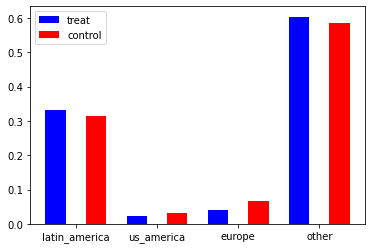

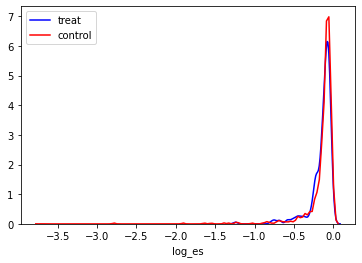

distributions are different with test stat = 100786.000 (p=7.558E-03)


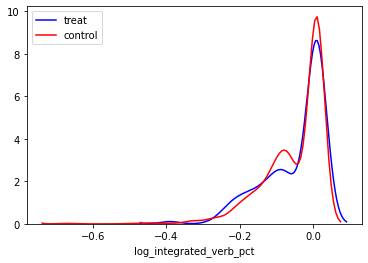

distributions are different with test stat = 108462.500 (p=2.166E-01)


In [288]:
scalar_vars = ['log_es', 'log_integrated_verb_pct']
visualize_test_treat_control_data(treatment_data, control_data, unique_locations, scalar_vars, cat_var_rescale_factor=cat_var_rescale_factor)

In [289]:
match_data = get_matching_pairs(treatment_data, control_data, scaler=True)

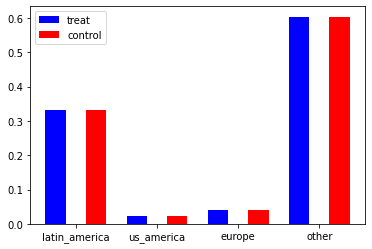

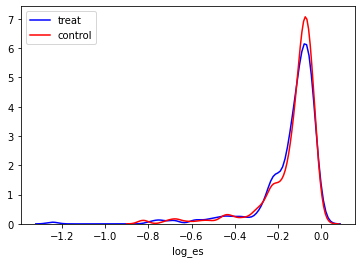

distributions are different with test stat = 35161.500 (p=2.387E-01)


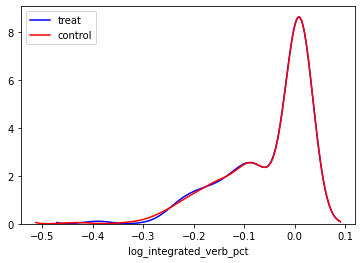

distributions are different with test stat = 36279.500 (p=4.591E-01)


In [290]:
scalar_vars = ['log_es', 'log_integrated_verb_pct']
visualize_test_treat_control_data(treatment_data, match_data, unique_locations, scalar_vars, cat_var_rescale_factor=cat_var_rescale_factor)

In [291]:
# get authors
author_var = 'screen_name'
treated_authors = clean_loanword_author_social_data.loc[treatment_data.index, :].loc[:, author_var].unique()
control_authors = clean_loanword_author_social_data.loc[match_data.index, :].loc[:, author_var].unique()
print(len(treated_authors))
print(len(control_authors))

270
270


In [292]:
from scipy.stats import chi2_contingency
treated_author_loanword_post_data = loanword_post_data[loanword_post_data.loc[:, author_var].isin(treated_authors)]
control_author_loanword_post_data = loanword_post_data[loanword_post_data.loc[:, author_var].isin(control_authors)]
dep_var = 'has_light_verb'
contingency_table = [
    [
        treated_author_loanword_post_data.loc[:, dep_var].sum(), 
        control_author_loanword_post_data.loc[:, dep_var].sum(), 
    ],
    [
        (1-treated_author_loanword_post_data.loc[:, dep_var]).sum(), 
        (1-control_author_loanword_post_data.loc[:, dep_var]).sum(), 
    ],
]
contingency_table = pd.DataFrame(contingency_table, index=['light_verb', 'integrated_verb'], columns=['medium_media', 'extreme_media'])
norm_contingency_table = contingency_table.div(contingency_table.sum(axis=0))
test_stat, p_val, dof, expected_table = chi2_contingency(contingency_table)
print(contingency_table)
print(norm_contingency_table)
print('difference is significant with test stat %.3f (p=%.3E)'%(test_stat, p_val))

                 medium_media  extreme_media
light_verb                 82            107
integrated_verb           225            190
                 medium_media  extreme_media
light_verb           0.267101       0.360269
integrated_verb      0.732899       0.639731
difference is significant with test stat 5.669 (p=1.727E-02)


OK! We see a result now. 

After matching on covariates, we see that authors who share a medium amount of Latin American media (between 20-80%) use light verbs significantly less often than authors who share an extreme amount of media (<20% or >80%). This effect is robust for more extreme cutoffs, e.g. 10-90%.

Do we also see this trend with native verbs?

In [297]:
native_verb_post_data = pd.read_csv('../../data/mined_tweets/native_verb_use_author_social_data.tsv', sep='\t')
dep_var = 'has_light_verb'
native_verb_post_data = native_verb_post_data.assign(**{
    dep_var : (native_verb_post_data.loc[:, 'native_word_category']=='native_light_verb').astype(int)
})
print(native_verb_post_data.shape[0])
print(native_verb_post_data.loc[:, dep_var].mean())

330988
0.044950270100426605


In [298]:
from scipy.stats import chi2_contingency
treated_author_native_verb_post_data = native_verb_post_data[native_verb_post_data.loc[:, author_var].isin(treated_authors)]
control_author_native_verb_post_data = native_verb_post_data[native_verb_post_data.loc[:, author_var].isin(control_authors)]
dep_var = 'has_light_verb'
contingency_table = [
    [
        treated_author_native_verb_post_data.loc[:, dep_var].sum(), 
        control_author_native_verb_post_data.loc[:, dep_var].sum(), 
    ],
    [
        (1-treated_author_native_verb_post_data.loc[:, dep_var]).sum(), 
        (1-control_author_native_verb_post_data.loc[:, dep_var]).sum(), 
    ],
]
contingency_table = pd.DataFrame(contingency_table, index=['light_verb', 'integrated_verb'], columns=['medium_media', 'extreme_media'])
norm_contingency_table = contingency_table.div(contingency_table.sum(axis=0))
test_stat, p_val, dof, expected_table = chi2_contingency(contingency_table)
print(contingency_table)
print(norm_contingency_table)
print('difference is significant with test stat %.3f (p=%.3E)'%(test_stat, p_val))

                 medium_media  extreme_media
light_verb                229            252
integrated_verb          6507           5921
                 medium_media  extreme_media
light_verb           0.033996       0.040823
integrated_verb      0.966004       0.959177
difference is significant with test stat 3.996 (p=4.560E-02)


A similar result here: medium-media authors tend to use integrated verbs at a slightly higher rate.

Sanity check: can we verify that the treated and control authors use a similar spread of loanwords?

In [307]:
from scipy.stats import chi2_contingency
treated_author_loanword_counts = treated_author_loanword_post_data.loc[:, 'loanword'].value_counts()
control_author_loanword_counts = control_author_loanword_post_data.loc[:, 'loanword'].value_counts()
# compare difference
combined_author_loanword_counts = pd.concat([treated_author_loanword_counts, control_author_loanword_counts], axis=1).fillna(0, inplace=False).transpose()
combined_author_loanword_counts.index = ['treated', 'control']
test_stat, p_val, dof, expected_counts = chi2_contingency(combined_author_loanword_counts)
print('difference in distributions is significant with test stat %.3f (p=%.3E)'%(test_stat, p_val))

difference in distributions is significant with test stat 80.003 (p=1.153E-01)


In [310]:
treated_author_native_verb_counts = treated_author_native_verb_post_data.loc[:, 'native_word_type'].value_counts()
control_author_native_verb_counts = control_author_native_verb_post_data.loc[:, 'native_word_type'].value_counts()
# compare difference
combined_author_native_verb_counts = pd.concat([treated_author_native_verb_counts, control_author_native_verb_counts], axis=1).fillna(0, inplace=False).transpose()
combined_author_native_verb_counts.index = ['treated', 'control']
test_stat, p_val, dof, expected_counts = chi2_contingency(combined_author_native_verb_counts)
print('difference in distributions is significant with test stat %.3f (p=%.3E)'%(test_stat, p_val))

difference in distributions is significant with test stat 117.750 (p=3.277E-08)


OK great! The loanword results are unlikely to be explained by differences in the loanword types, but the native verb results may be explained by differences in the native word types.

### Matching: all covariates
Let's do matching on all covariates including:
- language
- location
- integrated verb use
- post activity
- URL shares
- RT shares

In [ ]:
# loanword data
filter_vars = ['es_bin', 'latin_american_media_pct_bin', 'description_location_region', 'integrated_verb_pct', 'post_pct', 'RT_pct', 'URL_pct']
scalar_vars = ['integrated_verb_pct', 'post_pct', 'RT_pct', 'URL_pct']
loanword_author_social_data = load_clean_data('../../data/mined_tweets/loanword_authors_combined_balanced_media_full_social_data.tsv', filter_vars=filter_vars, scalar_vars=scalar_vars, data_type='loanword')
# native verb data
filter_vars = ['es_bin', 'latin_american_media_pct_bin', 'description_location_region', 'post_pct', 'RT_pct', 'URL_pct']
scalar_vars = ['post_pct', 'RT_pct', 'URL_pct']
